<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2024 </h4>
    <hr>
    <h1> Homework 4: K-nearest Neighbors</h1>
    <h3></h3>
</center>

## Description

<font face="Times New Roman">Students need to implement the KNN classification algorithm, and display the classification diagrams for different values of K .</font>

### 1.1 Data processing

In [2]:
# Load Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [3]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
# Display part of raw data
df.head(10)
#print(data.head(10))  # Display the first 10 rows of DataFrame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
# Prepare the data
X = df.drop('target', axis=1)
y = df['target']

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into training and test sets
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

#print(y_test.iloc[0])

2


In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train_full)
X_test = pca.transform(X_test_full)

### 1.2 Model training and prediction

In [ ]:
# Build a K-nearest Neighbors model and fit the data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Prediction
y_pred = knn.predict(X_test)


### 1.3 Performance metrics

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
acc = accuracy_score(y_test, y_pred)
print(f'K={5}, 准确率={acc:.4f}')
print(f'f1 score:{f1_score(y_test,y_pred,average='macro')}')

K=5, 准确率=0.9111
f1 score:0.9107142857142857


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report: ")
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



precision：精确率，表示预测为正例的样本中真正为正例的比例。精确率越高，说明模型预测为正例的样本中，真正为正例的样本越多。

recall：召回率，表示真正为正例的样本中被预测为正例的比例。召回率越高，说明模型找出了越多的真正正例。

f1-score：F1分数，是精确率和召回率的调和平均数。F1分数越高，说明模型在精确率和召回率之间取得了更好的平衡。

support：支持数，即该类别的样本数。

## 3 Visualizing results

### 3.1 Confusion Matrix

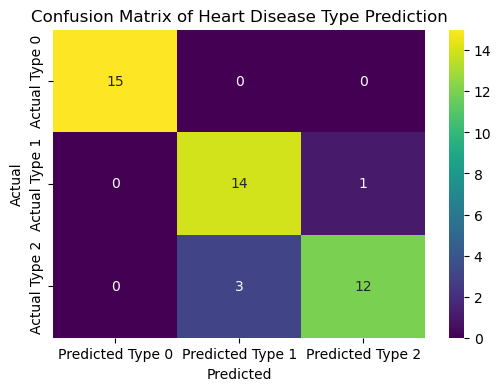

In [ ]:
import seaborn as sns

# 计算混淆矩阵
cm = confusion_matrix(y_test,y_pred)

# 创建一个 DataFrame，用于绘制热力图
cm_df = pd.DataFrame(cm, index=['Actual Type 0', 'Actual Type 1','Actual Type 2'],
                     columns=['Predicted Type 0', 'Predicted Type 1','Predicted Type 2'])

# 绘制混淆矩阵的热力图
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix of Heart Disease Type Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 3.2 Decision boundary

In [ ]:
# Define the plotting function
def plot_decision_boundaries(X, y, k, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
    
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(
        x=X[:, 0], y=X[:, 1],
        hue=y,
        palette=cmap_bold,
        alpha=1.0, edgecolor="black"
    )
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

## Effect of different K values

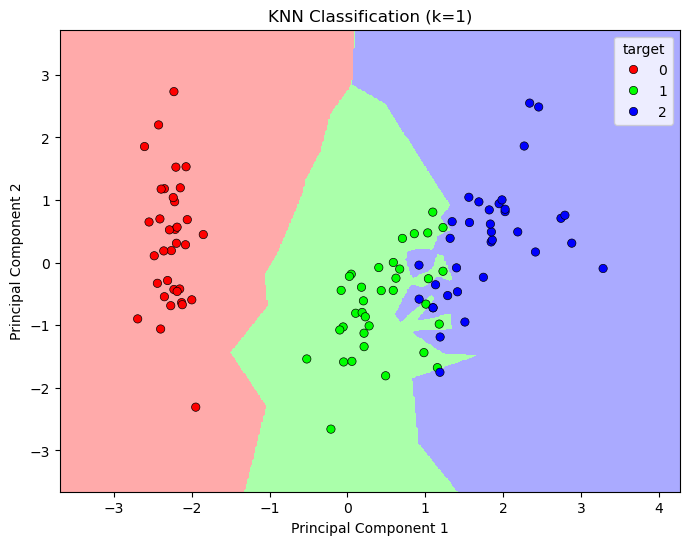

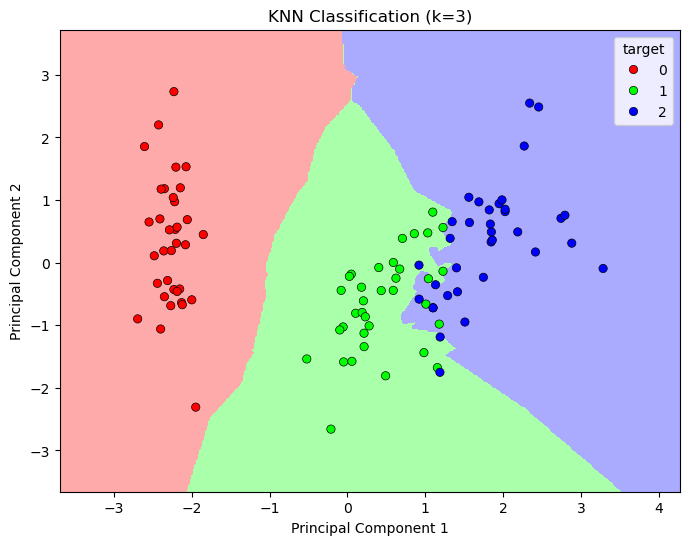

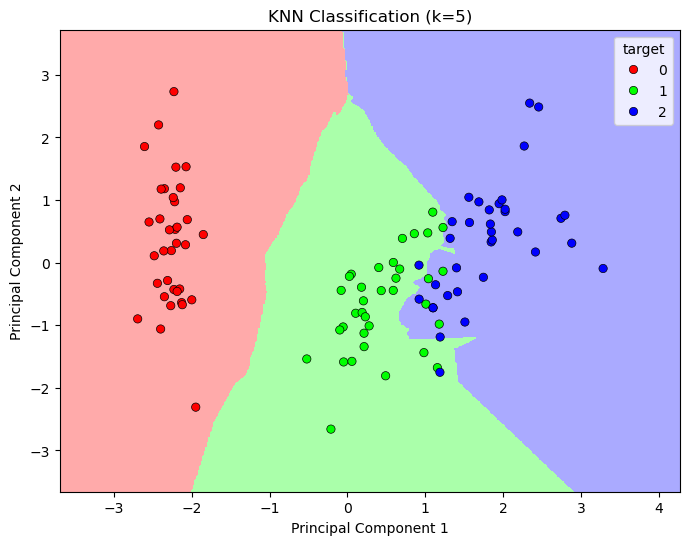

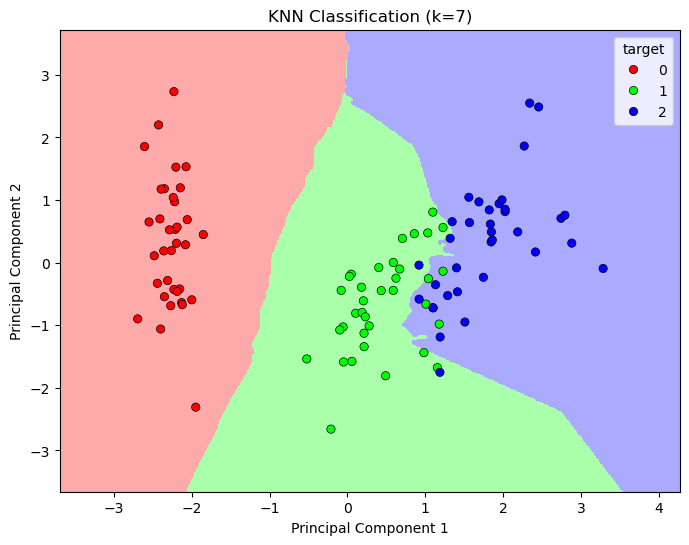

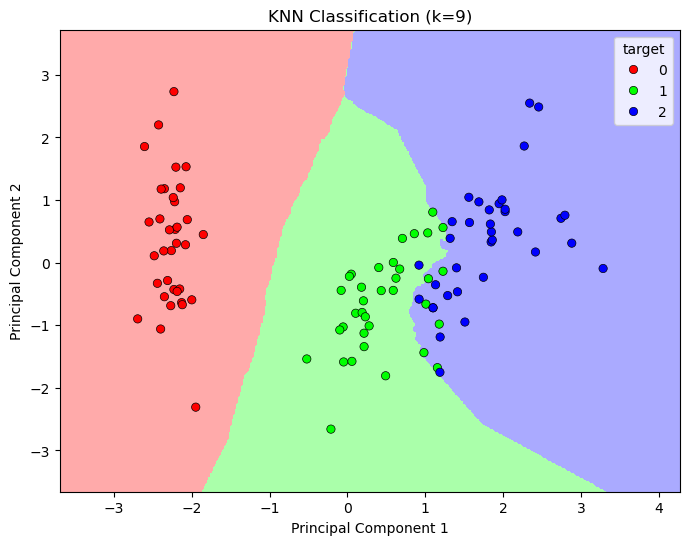

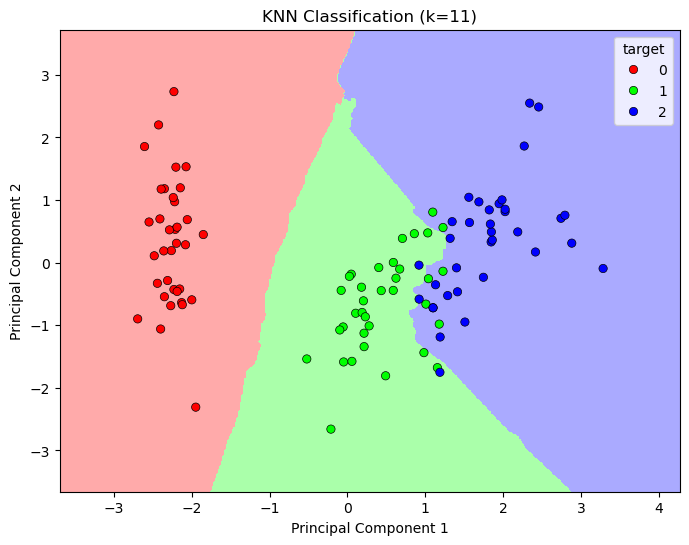

In [ ]:
# Test different K values
k_values = [1, 3, 5, 7, 9, 11]

for k in k_values:
    plot_decision_boundaries(
        X_train, y_train,
        k=k,
        title=f'KNN Classification (k={k})'
    )


K=1, acc=0.9333
K=2, acc=0.8889
K=3, acc=0.9111
K=4, acc=0.8667
K=5, acc=0.9111
K=6, acc=0.9111
K=7, acc=0.9111
K=8, acc=0.9333
K=9, acc=0.9111
K=10, acc=0.9111
K=11, acc=0.9111
K=13, acc=0.9111
K=15, acc=0.9111
K=17, acc=0.8889
K=19, acc=0.8889


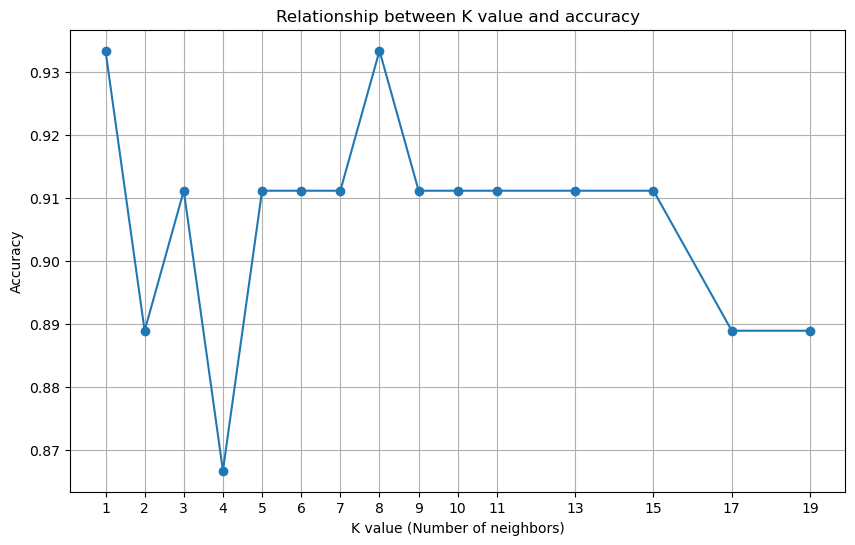

In [ ]:
from sklearn.metrics import accuracy_score
k_values = [1, 2,3,4, 5,6, 7,8, 9,10, 11,13,15,17,19]
accuracies = []
for k in k_values:
    # model training and predicting

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'K={k}, acc={acc:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Relationship between K value and accuracy')
plt.xlabel('K value (Number of neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()